# CZ4042 Project - Custom Inception V3 model (best model)
## By Team Project Car Formula, with members:
### Tham Wei Jie Marcus
### Padhi Abhinandan
### Chan Beng Chung


In [ ]:
# IGNORE ALL WARNINGS
import warnings
warnings.filterwarnings('ignore')

# STANDARD LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# FILE MANIPULATION
from scipy.io import loadmat
import os
import random
import pickle

# UTILITIES
from tqdm.notebook import tqdm

# CNN
import tensorflow as tf
print("TensorFlow version: ", tf.__version__,'\n')

# Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# For our Custom Inception V3 model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.python.keras import backend
from tensorflow.python.keras.applications import imagenet_utils
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.layers import VersionAwareLayers
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
from tensorflow.python.util.tf_export import keras_export
layers = VersionAwareLayers()

## Check GPU being used
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

TensorFlow version:  2.3.0 

Mon Nov 23 13:43:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                           

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/Project Car Formula/5050.zip' -d /content/CZ4042_Project/

Streaming output truncated to the last 5000 lines.
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/06152.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/00480.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/03389.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/06385.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/04034.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/07475.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/07677.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/00518.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/01410.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/working/data/train/0109/06419.jpg  
  inflating: /content/CZ4042_Project/CNNstanfordcars/workin

In [ ]:
# Constants
batch_size = 32
img_height = 224
img_width = 224
IMAGE_SHAPE = (img_height, img_width, 3)
CLASS_NUM = 196

epochs=100

AUTOTUNE = tf.data.experimental.AUTOTUNE # For performance

In [ ]:
working_dir = '/content/CZ4042_Project/CNNstanfordcars/working'
train_dir = working_dir + '/data/train'
train_ds = keras.preprocessing.image_dataset_from_directory(train_dir, validation_split = 0.2, subset = "training", seed = 123, image_size=(img_height, img_width), batch_size = batch_size)
val_ds = keras.preprocessing.image_dataset_from_directory(train_dir, validation_split = 0.2, subset = "validation", seed = 123, image_size=(img_height, img_width), batch_size = batch_size)

Found 8144 files belonging to 196 classes.
Using 6516 files for training.
Found 8144 files belonging to 196 classes.
Using 1628 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Number of classes: ", num_classes)
print("Classes:")
print(class_names)

Number of classes:  196
Classes:
['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059', '0060', '0061', '0062', '0063', '0064', '0065', '0066', '0067', '0068', '0069', '0070', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0081', '0082', '0083', '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0093', '0094', '0095', '0096', '0097', '0098', '0099', '0100', '0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121'

In [ ]:
# Batch has size = 32, Image dimensions = (224,224), 3 channels (RGB)
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [ ]:
# Optimizing for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Cache, shuffle, and prefetch for train set
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) # Same for validation set

In [ ]:
# Our Custom Inception V3 model for TensorFlow / Keras.
# Modifications include regularization, data augmentation layers, and additional denser layers on top
# Reference paper: Rethinking the Inception Architecture for Computer Vision (http://arxiv.org/abs/1512.00567) (CVPR 2016)
# Reference for code: TensorFlow InceptionV3 Python Source Code

def Custom_InceptionV3(
    weights='imagenet',
    input_shape=None,
    pooling=None,
    classifier_activation='softmax'):

    # constants
    channel_axis = 3
    if input_shape == None:
        input_shape = (224, 224, 3)
    
    # image input
    img_input = layers.Input(shape=input_shape)

    # start of main model using conv2d_bn layers (conv2d and batch_normalization layers combined)
    x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
    x = conv2d_bn(x, 32, 3, 3, padding='valid')
    x = conv2d_bn(x, 64, 3, 3)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding='valid')
    x = conv2d_bn(x, 192, 3, 3, padding='valid')
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = layers.concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed0')

    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed1')

    # mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate([branch1x1, branch5x5, branch3x3dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed2')

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding='valid')

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate([branch3x3, branch3x3dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed3')

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed4')

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = layers.AveragePooling2D((3, 3),
                                                strides=(1, 1),
                                                padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool],
                                axis=channel_axis,
                                name='mixed' + str(5 + i))

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate([branch1x1, branch7x7, branch7x7dbl, branch_pool],
                            axis=channel_axis,
                            name='mixed7')

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3, strides=(2, 2), padding='valid')

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate([branch3x3, branch7x7x3, branch_pool],
                            axis=channel_axis,
                            name='mixed8')

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = layers.concatenate([branch3x3_1, branch3x3_2],
                                        axis=channel_axis,
                                        name='mixed9_' + str(i))

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = layers.concatenate([branch3x3dbl_1, branch3x3dbl_2],
                                            axis=channel_axis)

        branch_pool = layers.AveragePooling2D((3, 3),
                                                strides=(1, 1),
                                                padding='same')(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate([branch1x1, branch3x3, branch3x3dbl, branch_pool],
                                axis=channel_axis,
                                name='mixed' + str(9 + i))

    if pooling == 'avg':
        x = layers.GlobalAveragePooling2D()(x)
    elif pooling == 'max':
        x = layers.GlobalMaxPooling2D()(x)

    # finializing model
    inputs = img_input
    model = training.Model(inputs, x, name='inception_v3')

    # Load imagenet weights
    WEIGHTS_PATH_NO_TOP = (
    'https://storage.googleapis.com/tensorflow/keras-applications/'
    'inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
    weights_path = data_utils.get_file(
        'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
        WEIGHTS_PATH_NO_TOP,
        cache_subdir='models',
        file_hash='bcbd6486424b2319ff4ef7d526e38f63')
    model.load_weights(weights_path)
    
    return model

In [ ]:
# Utility function to apply Conv2D and BatchNormalization.
def conv2d_bn(x, filters, num_row, num_col, padding='same', strides=(1, 1), name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    
    bn_axis = 3 # Channels last
    
    x = layers.Conv2D(filters, (num_row, num_col),
                      strides=strides,
                      padding=padding,
                      use_bias=False,
                      kernel_regularizer=keras.regularizers.l2(1e-5),
                      name=conv_name)(x)
    x = layers.BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = layers.Activation('relu', name=name)(x)
    
    return x

In [ ]:
# data augmentation (mix of random horizontal flips, rotations, and zooms) and rescaling to [0,1] range
input_shape = (img_height, img_width, 3)
img_input = keras.Input(shape=input_shape)
x = preprocessing.RandomFlip("horizontal")(img_input)
x = preprocessing.RandomRotation(0.1)(x)
x = preprocessing.RandomZoom(0.1)(x)
x = preprocessing.Rescaling(1.0 / 255)(x)

# Custom Inception V3 model
x = Custom_InceptionV3(weights="imagenet", input_shape=input_shape)(x)

# final dense/FC layers
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x)
x = Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(1e-5))(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation=None)(x)

model = Model(inputs=img_input, outputs=x)
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.1)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=["accuracy"])

model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_______________________________________________________

In [ ]:
checkpoint_path = '/content/drive/MyDrive/CZ4042_Project/training/Custom_InceptionV3_BEST_2'

# Create a callback that saves the model's weights
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 monitor='val_accuracy',
                                                 mode='max',
                                                 save_best_only=True,
                                                 verbose=0)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose = 2,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/100
204/204 - 39s - loss: 5.9014 - accuracy: 0.0052 - val_loss: 5.8626 - val_accuracy: 0.0049
Epoch 2/100
204/204 - 35s - loss: 5.8574 - accuracy: 0.0058 - val_loss: 5.8615 - val_accuracy: 0.0055
Epoch 3/100
204/204 - 35s - loss: 5.8547 - accuracy: 0.0084 - val_loss: 5.8537 - val_accuracy: 0.0104
Epoch 4/100
204/204 - 34s - loss: 5.8522 - accuracy: 0.0075 - val_loss: 5.8533 - val_accuracy: 0.0080
Epoch 5/100
204/204 - 34s - loss: 5.8526 - accuracy: 0.0081 - val_loss: 5.8714 - val_accuracy: 0.0049
Epoch 6/100
204/204 - 34s - loss: 5.8510 - accuracy: 0.0064 - val_loss: 5.8510 - val_accuracy: 0.0055
Epoch 7/100
204/204 - 34s - loss: 5.8496 - accuracy: 0.0069 - val_loss: 5.8490 - val_accuracy: 0.0037
Epoch 8/100
204/204 - 34s - loss: 5.8476 - accuracy: 0.0068 - val_loss: 5.8470 - val_accuracy: 0.0043
Epoch 9/100
204/204 - 33s - loss: 5.8442 - accuracy: 0.0077 - val_loss: 5.8737 - val_accuracy: 0.0055
Epoch 10/100
204/204 - 34s - loss: 5.8322 - accuracy: 0.0063 - val_loss: 5.8227 - 

In [ ]:
# Extract Loss Values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract Accuracy Values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

instanced_variables = [train_loss, val_loss, train_acc, val_acc]

In [ ]:
#Save model
model.save('/content/drive/MyDrive/CZ4042_Project/Custom_InceptionV3_BEST_2')

#Save variables
filename = '/content/drive/MyDrive/CZ4042_Project/Custom_InceptionV3_BEST_2_variables'
outfile = open(filename,'wb')
pickle.dump(instanced_variables, outfile)
outfile.close() 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CZ4042_Project/Custom_InceptionV3_BEST_2/assets


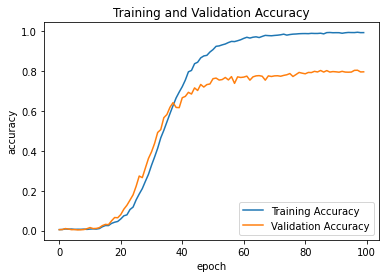

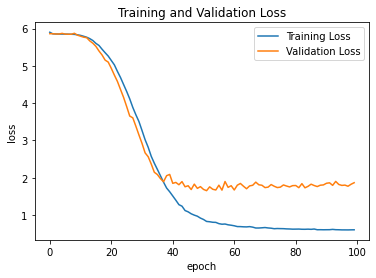

In [ ]:
epochs_range = range(epochs)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.savefig('/content/drive/MyDrive/CZ4042_Project/InceptionV3_BEST_2_acc.pdf')
plt.savefig('/content/drive/MyDrive/CZ4042_Project/InceptionV3_BEST_2_acc.png')
plt.show()
plt.close()

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/CZ4042_Project/InceptionV3_BEST_2_loss.pdf')
plt.savefig('/content/drive/MyDrive/CZ4042_Project/InceptionV3_BEST_2_loss.png')
plt.show()

In [ ]:
test_ds = keras.preprocessing.image_dataset_from_directory(working_dir + '/data/test', seed = 123, image_size=(img_height, img_width), batch_size = batch_size)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 8041 files belonging to 196 classes.


In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.save_weights('/content/drive/MyDrive/CZ4042_Project/InceptionV3_main_6')

In [ ]:
test_loss, test_acc = model.evaluate(
    x=test_ds, 
    y=None, 
    batch_size=batch_size)
print("Test accuracy:", test_acc)

252/252 [==============================] - 13s 53ms/step - loss: 1.7584 - accuracy: 0.8077
Test accuracy: 0.8077353835105896


In [ ]:
val_loss_, val_acc_ = model.evaluate(
    x=val_ds, 
    y=None, 
    batch_size=batch_size)
print("Validation accuracy:", val_acc_)

51/51 [==============================] - 2s 49ms/step - loss: 1.7710 - accuracy: 0.8028
Validation accuracy: 0.8028255701065063


Actual car:    BMW X3 SUV 2012
Predicted car: BMW X3 SUV 2012
Actual Class:    37
Predicted Class: 37


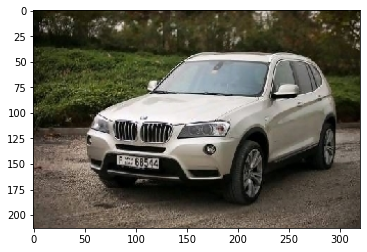

In [ ]:
# Test the model on an unseen image from the test set
import cv2
path_to_train_matfile = '/content/CZ4042_Project/CNNstanfordcars/devkit/cars_train_annos.mat'
raw_train_data = loadmat(path_to_train_matfile)
path_to_test_matfile = '/content/CZ4042_Project/CNNstanfordcars/devkit/cars_test_annos_withlabels.mat'
raw_test_data = loadmat(path_to_test_matfile)
train_annots_data = np.transpose(raw_train_data["annotations"])
test_annots_data = np.transpose(raw_test_data["annotations"])

random_index = random.randint(0, 8041)
test_path = '/content/CZ4042_Project/CNNstanfordcars/cars_test/cars_test'
relative_path = (test_annots_data[random_index,:])[0][5][0]
random_car = cv2.imread(os.path.join(test_path, relative_path))
car_rgb = cv2.cvtColor(random_car, cv2.COLOR_BGR2RGB)
plt.imshow(car_rgb)
path_to_labels_matfile = '/content/CZ4042_Project/CNNstanfordcars/devkit/cars_meta.mat'
raw_labels_data = loadmat(path_to_labels_matfile)

img = keras.preprocessing.image.load_img(
    os.path.join(test_path, relative_path), target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = predictions[0]

print("Actual car:   ", raw_labels_data["class_names"][0][test_annots_data[random_index][0][4][0][0] - 1][0])
print("Predicted car: {}"
    .format(raw_labels_data["class_names"][0][int(class_names[np.argmax(score)]) - 1][0]))
print("Actual Class:   ", test_annots_data[random_index][0][4][0][0])
print("Predicted Class:", int(class_names[np.argmax(score)]))